In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  # == data = eval_js(f'takePhoto({quality})')
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


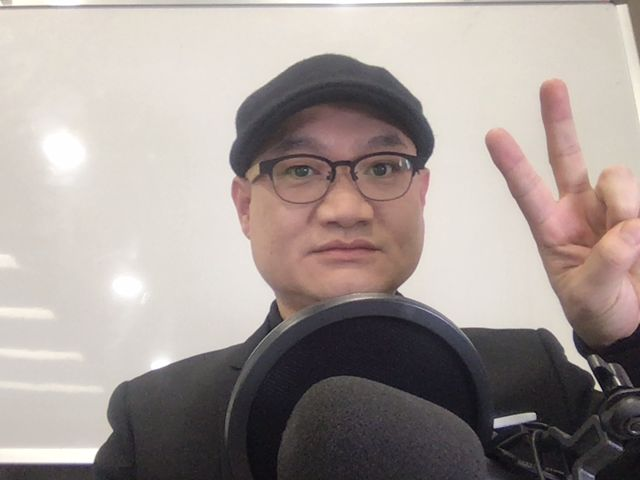

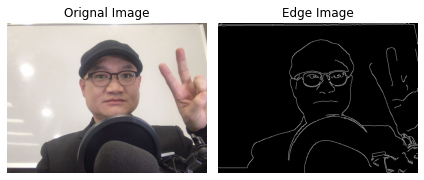

In [21]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg')
edges = cv2.Canny(img,100,200)

from matplotlib.pyplot import imshow, subplot, axis, title,show,tight_layout
subplot(1,2,1),  title('Orignal Image'),   axis(False)
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

subplot(1,2,2),  title('Edge Image'),   axis(False)
imshow(edges,cmap = 'gray')

tight_layout()
show()

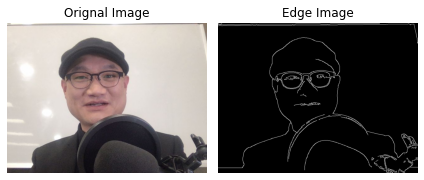

In [20]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg')
edges = cv2.Canny(img,100,200)

from matplotlib.pyplot import imshow, subplot, axis, title,show,tight_layout
subplot(1,2,1),  title('Orignal Image'),   axis(False)
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

subplot(1,2,2),  title('Edge Image'),   axis(False)
imshow(edges,cmap = 'gray')

tight_layout()
show()

<IPython.core.display.Javascript object>

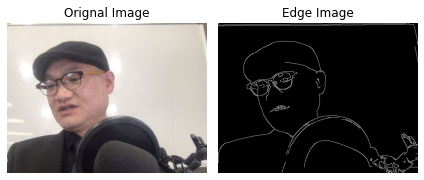

In [24]:
import cv2
import matplotlib.pyplot as plt

filename = take_photo()

img = cv2.imread('photo.jpg')
edges = cv2.Canny(img,100,200)

from matplotlib.pyplot import imshow, subplot, axis, title,show,tight_layout
subplot(1,2,1),  title('Orignal Image'),   axis(False)
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

subplot(1,2,2),  title('Edge Image'),   axis(False)
imshow(edges,cmap = 'gray')

tight_layout()
show()

In [27]:
x=33
print('xx=',str(x))


xx= 33


In [29]:
x=33
print('xx={}'.format(x))

xx=33


In [30]:
x=33
print(f'xx={x}')

xx=33


<IPython.core.display.Javascript object>

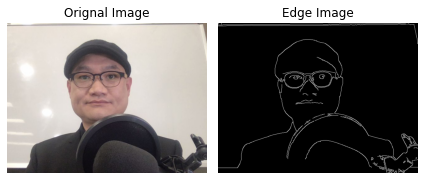

<IPython.core.display.Javascript object>

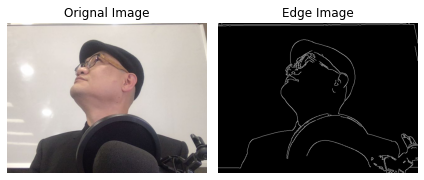

In [36]:
from matplotlib.pyplot import imshow, subplot, axis, title,show,tight_layout
for i in range(2):
  take_photo(f'p{i}.png')
  img = cv2.imread(f'p{i}.png')
  edges = cv2.Canny(img,100,200)
  subplot(1,2,1),  title('Orignal Image'),   axis(False)
  imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

  subplot(1,2,2),  title('Edge Image'),   axis(False)
  imshow(edges,cmap = 'gray')

  tight_layout()
  show()